# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Load Data**

In [ ]:
health_data=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
health_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
health_data.shape

(5110, 12)

In [ ]:
health_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
health_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##**Drop columns**

In [ ]:
# Drop Id column
health_data.drop(['id'],axis=1,inplace=True)

In [ ]:
health_data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### **Check for Duplicate**

In [ ]:
health_data[health_data.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


### **Check for Null**

In [ ]:
health_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

bmi column has 201 null values

In [ ]:
health_data['bmi'].mean() # mean of bmi column

28.893236911794666

In [ ]:
# Fill null values with mean
health_data['bmi']=health_data['bmi'].fillna(health_data['bmi'].mean())

In [ ]:
health_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64



---



## **Visualization of Categorical Columns**

In [ ]:
# Find categorical columns
cat_columns=health_data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

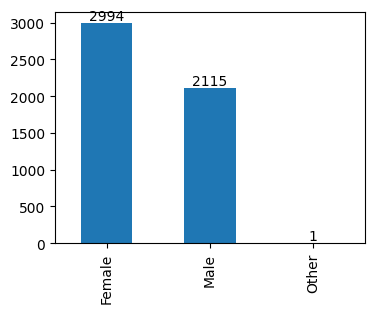

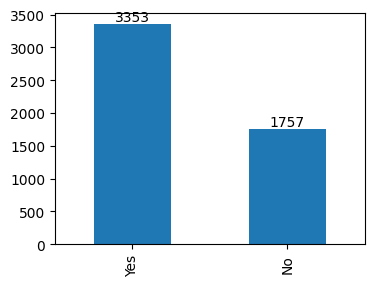

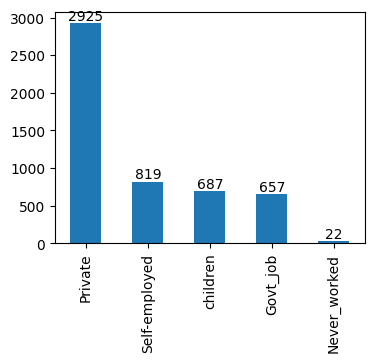

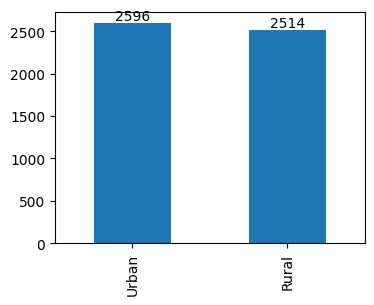

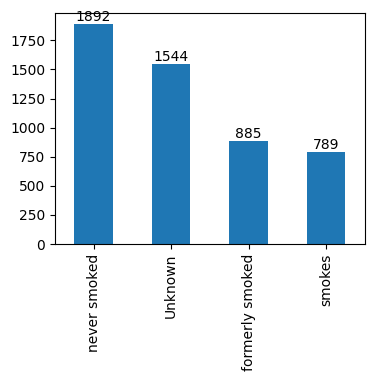

In [ ]:
for col in cat_columns:
  plt.figure(figsize=(4,3))
  ax=health_data[col].value_counts().plot(kind='bar')
  for i in ax.containers:
    ax.bar_label(i)
  plt.show()

## **Numerical Columns:**

In [ ]:
# Find numerical columns
num_columns=health_data.select_dtypes(include=np.number).columns
num_columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [ ]:
num_cols=['age','avg_glucose_level','bmi']

### **Numeric Columns Histogram **

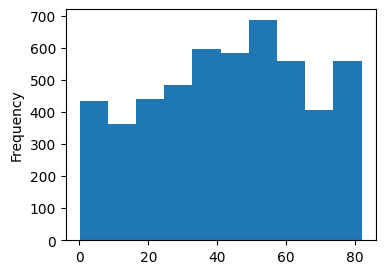

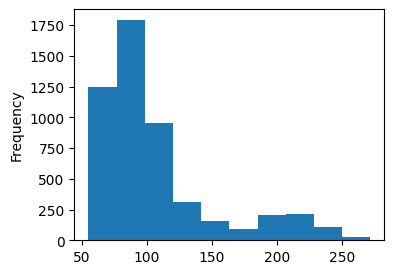

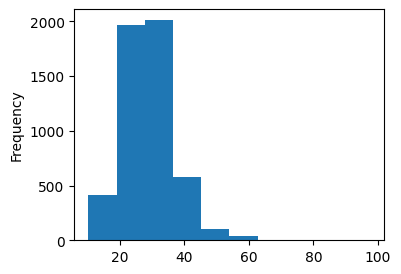

In [ ]:
for col in num_cols:
  plt.figure(figsize=(4,3))
  health_data[col].plot(kind='hist')
  for i in ax.containers:
    ax.bar_label(i)
  plt.show()

### **Numeric Columns Box Plot**

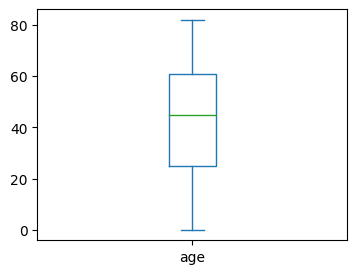

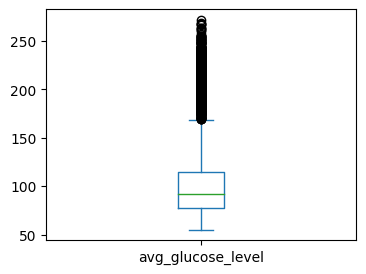

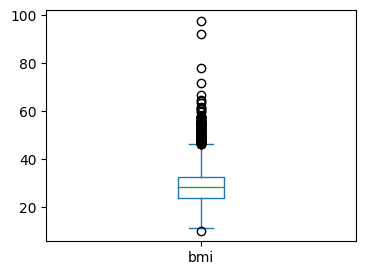

In [ ]:
for col in num_cols:
  plt.figure(figsize=(4,3))
  health_data[col].plot(kind='box')
  for i in ax.containers:
    ax.bar_label(i)
  plt.show()

## **Scatter plot**
### correlation among Numeric Variables

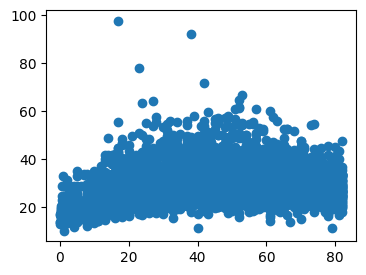

In [ ]:
# Correlation between age and bmi
plt.figure(figsize=(4,3))
plt.scatter(health_data.age,health_data.bmi)
plt.show()

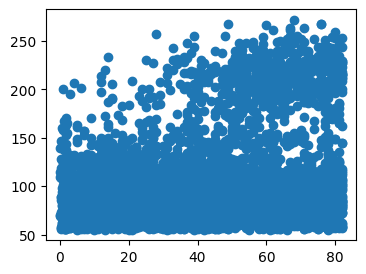

In [ ]:
# Correlation between age and average glucose level
plt.figure(figsize=(4,3))
plt.scatter(x=health_data.age,y=health_data.avg_glucose_level)
plt.show()

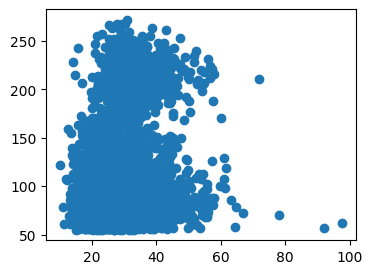

In [ ]:
# Correlation between bmi and average glucose level
plt.figure(figsize=(4,3))
plt.scatter(x=health_data.bmi,y=health_data.avg_glucose_level)
plt.show()

### **correlation Matrix**

In [ ]:
cor_matrix=health_data[num_columns].corr()
cor_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


**Correlation with heatmap**

<Axes: >

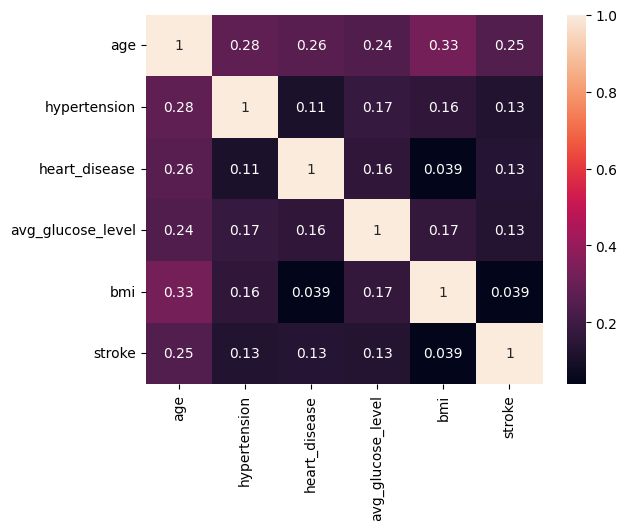

In [ ]:
sns.heatmap(cor_matrix,annot=True)

* the above heatmap shows that the bmi and age has the highest correlation



---



In [ ]:
health_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# **Balance the Data:**

**Target variable : stroke**

In [ ]:
health_data.shape

(5110, 11)

In [ ]:
health_data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

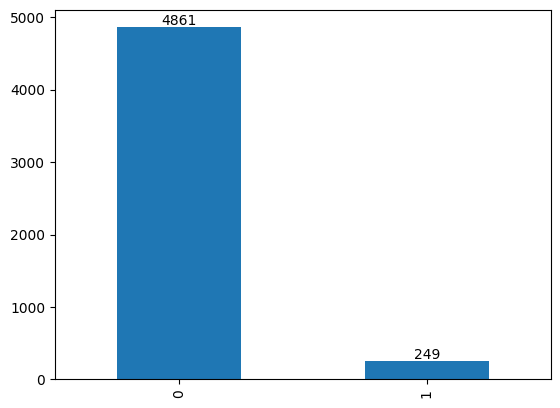

In [ ]:
ax=health_data.stroke.value_counts().plot(kind='bar')
for i in ax.containers:
  ax.bar_label(i)

In [ ]:
stroke_df=health_data[health_data['stroke']==1]
stroke_df.shape

(249, 11)

In [ ]:
no_stroke_df=health_data[health_data['stroke']==0]
no_stroke_df.shape

(4861, 11)

### **Selecting 300 recors from Data of the no_stroke data**

In [ ]:
no_stroke_df1=no_stroke_df.sample(300)
no_stroke_df1.shape

(300, 11)

### **Creating new Balanced Data set**

In [ ]:
health_data_balanced=pd.concat([stroke_df,no_stroke_df1],axis=0)
health_data_balanced.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
health_data_balanced.shape

(549, 11)

[Text(0, 0, '300'), Text(0, 0, '249')]


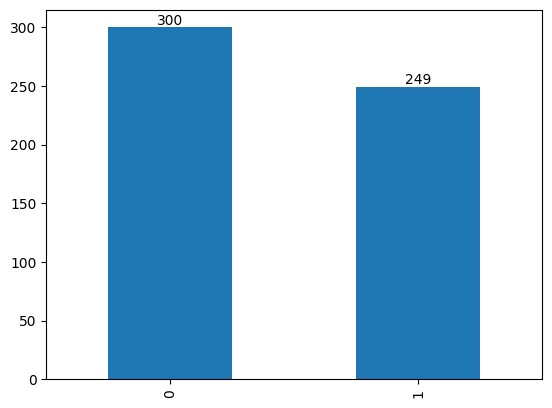

In [ ]:
ax=health_data_balanced.stroke.value_counts().plot(kind='bar')
for i in ax.containers:
  print(ax.bar_label(i))



---



## **Feature Engineering:**

### **Lable Encoding:**
 - Converting categorical columns to numeric columns using *label encoding*





In [ ]:
cat_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder=LabelEncoder()

In [ ]:
health_data_balanced['gender']=label_encoder.fit_transform(health_data_balanced['gender'])
le_gender=dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))
le_gender

{'Female': 0, 'Male': 1}

In [ ]:
health_data_balanced['ever_married']=label_encoder.fit_transform(health_data_balanced['ever_married'])
le_married=dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))
le_married

{'No': 0, 'Yes': 1}

In [ ]:
health_data_balanced['work_type']=label_encoder.fit_transform(health_data_balanced['work_type'])
le_work_type=dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))
le_work_type

{'Govt_job': 0,
 'Never_worked': 1,
 'Private': 2,
 'Self-employed': 3,
 'children': 4}

In [ ]:
health_data_balanced['Residence_type']=label_encoder.fit_transform(health_data_balanced['Residence_type'])
le_res=dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))
le_res

{'Rural': 0, 'Urban': 1}

In [ ]:
health_data_balanced['smoking_status']=label_encoder.fit_transform(health_data_balanced['smoking_status'])
le_smoke=dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))
le_smoke

{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}

In [ ]:
health_data_balanced.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


### **Feature Scalling:**
- Bringing all the Numeric variables on the same scale using Standardization or Normalization

In [ ]:
num_columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standard_scaler=StandardScaler()

In [ ]:
health_data_balanced['age']=standard_scaler.fit_transform(health_data_balanced[['age']])
health_data_balanced['avg_glucose_level']=standard_scaler.fit_transform(health_data_balanced[['avg_glucose_level']])
health_data_balanced['bmi']=standard_scaler.fit_transform(health_data_balanced[['bmi']])

In [ ]:
health_data_balanced.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.604724,0,1,1,2,1,2.088904,1.035652,1,1
1,0,0.342047,0,0,1,3,0,1.595314,-0.073670,2,1
2,1,1.173856,0,1,1,2,0,-0.199541,0.445492,2,1
3,0,-0.183306,0,0,1,2,1,1.017844,0.718981,3,1
4,0,1.130077,1,0,1,3,0,1.071713,-0.778009,2,1




---



## **Dependent and Independent Variables**

### **X , y**
- x is the independent variable and y is the dependent

In [ ]:
X=health_data_balanced.drop('stroke',axis=1) # droping the dependent variable
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,0.604724,0,1,1,2,1,2.088904,1.035652,1
1,0,0.342047,0,0,1,3,0,1.595314,-0.073670,2
2,1,1.173856,0,1,1,2,0,-0.199541,0.445492,2
3,0,-0.183306,0,0,1,2,1,1.017844,0.718981,3
4,0,1.130077,1,0,1,3,0,1.071713,-0.778009,2


### **Target Varialbe**

In [ ]:
y=health_data_balanced['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
1762    0
5003    0
4696    0
2271    0
1297    0
Name: stroke, Length: 549, dtype: int64

## **Splitting Data into Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((439, 10), (110, 10))



---



## **Model Building**

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic regression is used for training model

In [ ]:
log_reg=LogisticRegression()

**Model Training**

In [ ]:
log_reg.fit(X_train,y_train)

LogisticRegression()

**Model Prediction**

In [ ]:
y_pred=log_reg.predict(X_test)

**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Accuracy of the model**

In [ ]:
accuracy_score(y_test,y_pred)

0.7909090909090909

**Precision of the model**

In [ ]:
precision_score(y_test,y_pred)

0.8181818181818182

**Recall of the model**

In [ ]:
recall_score(y_test,y_pred)

0.7758620689655172

**Confusion Matrix**

In [ ]:
CM=confusion_matrix(y_test,y_pred)
CM

array([[42, 10],
       [13, 45]])

<Axes: >

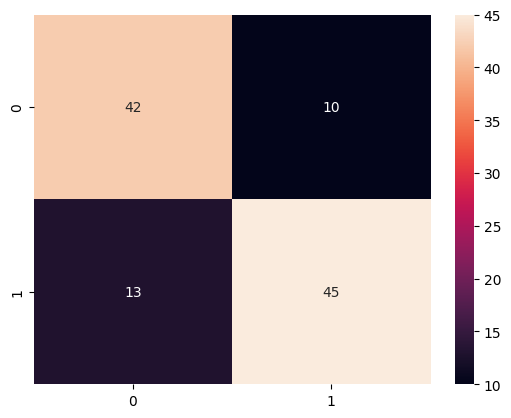

In [ ]:
sns.heatmap(CM,annot=True)

**Classification Report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        52
           1       0.82      0.78      0.80        58

    accuracy                           0.79       110
   macro avg       0.79      0.79      0.79       110
weighted avg       0.79      0.79      0.79       110



# **Building Multiple Models**: selecting best model


**Building Multiple Predictive Classification Models**
- Logistic Regression
- Decision Tee
- Random Forest
- K-Nearest Neighbors
- Suport Vector Machine(SVM)
- Naive Bays

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

**Building object of each model**

In [ ]:
log_reg_model=LogisticRegression()
decision_tree_model=DecisionTreeClassifier()
random_forest_model=RandomForestClassifier()
knn_model=KNeighborsClassifier()
svc_model=SVC()
naive_bays_model=GaussianNB()

####**Training models**

In [ ]:
model_list=[log_reg_model,decision_tree_model,random_forest_model,
            knn_model,svc_model,naive_bays_model]
acc_list=[]
model_name=[]
for model in model_list:
  model.fit(X_test,y_test)
  y_predicted=model.predict(X_test)
  acc=accuracy_score(y_test,y_predicted)
  acc_list.append(acc)
  model_name.append(model.__class__.__name__)

In [ ]:
model_df=pd.DataFrame({'Model':model_name,'Accuracy':acc_list})
model_df

,Model,Accuracy
0,LogisticRegression,0.836364
1,DecisionTreeClassifier,1.000000
2,RandomForestClassifier,1.000000
3,KNeighborsClassifier,0.836364
4,SVC,0.854545
5,GaussianNB,0.809091


## **Model Validation - K-Fold Cross Valiation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
models=[log_reg_model,decision_tree_model,random_forest_model,
            knn_model,svc_model,naive_bays_model]
features=X
labels=y
CV=5
accu_list=[]
Model_Name=[]
for model in models:
  models_name=model.__class__.__name__
  accuracies=cross_val_score(model,features,labels,scoring='accuracy',cv=CV)
  accu_list.append(accuracies.mean())
  Model_Name.append(models_name)

**Model Accuracy**

In [ ]:
model_df1=pd.DataFrame({'Model':Model_Name,'Accuracy':accu_list})
model_df1

,Model,Accuracy
0,LogisticRegression,0.755863
1,DecisionTreeClassifier,0.715763
2,RandomForestClassifier,0.781351
3,KNeighborsClassifier,0.737631
4,SVC,0.781368
5,GaussianNB,0.757631


## **Best ML Model with Hyper Parameter tuning:**
- GridSearchCV
- RandomizedSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

**Parameters**

In [ ]:
parameters={
    'n_estimators':[50,100],
    'max_features':['sqrt','log2',None]
}

**GridSearch cross validation**

In [ ]:
grid_search=GridSearchCV(estimator=random_forest_model,
                         param_grid=parameters)

**Model Fit**
-
the model is random forest

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

**Best Parameters**

In [ ]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 50}

###**Building New Model with Best Hyperparameters**

In [ ]:
Random_forest_model_new=RandomForestClassifier(max_features='sqrt',n_estimators=50)

In [ ]:
Accuracy_CV=cross_val_score(Random_forest_model_new,
                            features,
                            labels,
                            scoring='accuracy',
                            cv=CV)

**List of Accuracies**

In [ ]:
Accuracy_CV

array([0.68181818, 0.78181818, 0.83636364, 0.79090909, 0.75229358])

**Mean Accuracy of the model**

In [ ]:
mean_acc=Accuracy_CV.mean()

In [ ]:
print(f"Mean Accuracy of the model = {round(mean_acc*100,2)} %")

Mean Accuracy of the model = 76.86 %


## **Customize Predictions**

**the model with predict based on the user input values**

In [ ]:
Random_forest_model_new.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

**Getting data from input**

In [ ]:
print("-------------------Enter Patient's Data----------------")
Gender=int(input("Enter the Gender =",))
Age=int(input("Enter the Age = ",))
Age_scaled=standard_scaler.fit_transform([[Age]])[0][0]
HyperTension=int(input("Enter the HyperTension = ",))
HeartDisease=int(input("Enter the HeartDisease =",))
WorkType=int(input("Enter the WorkType =",))
EverMarried=int(input("Enter the EverMarried =",))
ResType=int(input("Enter the ResidentType =",))
AGL=float(input("Enter the Avg_glucose_level =",))
Glucose_scaled=standard_scaler.fit_transform([[AGL]])[0][0]
BMI=AGL=float(input("Enter the BMI ="))
bmi_scaled=standard_scaler.fit_transform([[BMI]])[0][0]
smokeStatus=int(input("Enter the smoking status =",))

-------------------Enter Patient's Data----------------
Enter the Gender =1
Enter the Age = 56
Enter the HyperTension = 1
Enter the HeartDisease =1
Enter the WorkType =2
Enter the EverMarried =1
Enter the ResidentType =2
Enter the Avg_glucose_level =45
Enter the BMI =34
Enter the smoking status =2


In [ ]:
patient_data=[Gender,Age_scaled,HyperTension,HeartDisease,WorkType,
              EverMarried,ResType,Glucose_scaled,bmi_scaled,smokeStatus]
prob=Random_forest_model_new.predict_proba([patient_data])
heart_stroke_prob=prob[0][1]*100

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("-------------------The Stroke Machine Learning Model----------------")
print()
print(f"Probabilty of the Heart Stroke in future  = {heart_stroke_prob} %")

-------------------The Stroke Machine Learning Model----------------

Probabilty of the Heart Stroke in future  = 44.0 %
